<a href="https://colab.research.google.com/github/tm2y17/MOT_Vehicle/blob/main/multi_task_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Environment**

In [1]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 59.4 MB/s eta 0:00:14tcmalloc: large alloc 1147494400 bytes == 0x39724000 @  0x7f8d5db4b615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████▋           | 1055.7 MB 1.2 MB/s eta 0:07:47tcmalloc: large alloc 1434370048 bytes == 0x7dd7a000 @  0x7f8d5db4b615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████████████▏     |

In [19]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [3]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu115/torch1.11.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu115/torch1.11.0/index.html
     |████████████████████████████████| 41.5 MB 15.4 MB/s 
     |████████████████████████████████| 190 kB 13.3 MB/s 


In [4]:
%cd drive/MyDrive/IRP/

/content/drive/MyDrive/IRP


In [5]:
%cd mmdetection
!pip install -e .

# Check installation
import mmdet
print(mmdet.__version__)

/content/drive/MyDrive/IRP/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/IRP/mmdetection
  Running setup.py develop for mmdet
2.25.0


In [6]:
%cd ..

/content/drive/MyDrive/IRP


In [7]:
%cd mmsegmentation
!pip install -e .

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

/content/drive/MyDrive/IRP/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/IRP/mmsegmentation
     |████████████████████████████████| 578 kB 14.3 MB/s 
  Running setup.py develop for mmsegmentation
0.25.0


In [8]:
%cd ..

/content/drive/MyDrive/IRP


In [9]:
%cd mmtracking
!pip install -e .

# Check MMSegmentation installation
import mmtrack
print(mmtrack.__version__)

/content/drive/MyDrive/IRP/mmtracking
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/IRP/mmtracking
     |████████████████████████████████| 1.5 MB 14.6 MB/s 
     |████████████████████████████████| 161 kB 83.6 MB/s 
  Created wheel for attributee: filename=attributee-0.1.5-py3-none-any.whl size=12076 sha256=3c1b0fae68b64e02dd9fbcb51b7ea777eceb0ffa2d3219d2b6dd31d42a311dc2
  Stored in directory: /root/.cache/pip/wheels/0f/12/3a/b7e98eb4e3d373862bf9f160f77171b72a3825c4867064d8b2
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1590229 sha256=9ad79a136eccb0027a74583b4b7d3da640cfe2ff8512790d863f30adb8a765c0
  Stored in directory: /root/.cache/pip/wheels/b1/0b/e3/ef9daf1b5547b56389e42c80c3100f1e6479bf5fd00fd9d6ba
Successfully built attributee lap
  Running setup.py develop for mmtrack
0.13.0


In [13]:
%cd ..

/content/drive/MyDrive/IRP


In [14]:
!pip install git+https://github.com/JonathonLuiten/TrackEval.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JonathonLuiten/TrackEval.git to /tmp/pip-req-build-emiuqi3g
  Running command git clone -q https://github.com/JonathonLuiten/TrackEval.git /tmp/pip-req-build-emiuqi3g
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for trackeval: filename=trackeval-1.0.dev1-py3-none-any.whl size=121499 sha256=f30963e1d75aaf3de217835c63f35292fc675a8870fdd867b40dae443681f8e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-zmwvs4u_/wheels/f3/ca/38/409a5a8b4faf77d7e99a90462e20a4723c5b0f20fa12364aa7
Successfully built trackeval


# **Multi task learning / config**

In [ ]:
from mmdet.models import DETECTORS
from mmseg.models import SEGMENTORS

In [ ]:
from mmcv import Config
from mmdet.models import build_detector
from mmseg.models import build_segmentor
import mmcv

cfg_detection = Config.fromfile('/content/drive/MyDrive/IRP/mmdetection/configs/_base_/models/mydetection.py')
cfg_segmentation = Config.fromfile('/content/drive/MyDrive/IRP/mmsegmentation/configs/_base_/models/mysegmentation.py')

In [ ]:
cfg_detection.data.train

{'ann_file': '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/splits/train.txt',
 'data_root': '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/',
 'img_prefix': '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/images',
 'pipeline': [{'type': 'LoadImageFromFile'},
  {'type': 'LoadAnnotations', 'with_bbox': True},
  {'img_scale': (1333, 800),
   'keep_ratio': True,
   'multiscale_mode': 'value',
   'type': 'Resize'},
  {'flip_ratio': 0.5, 'type': 'RandomFlip'},
  {'mean': [103.53, 116.28, 123.675],
   'std': [1.0, 1.0, 1.0],
   'to_rgb': False,
   'type': 'Normalize'},
  {'type': 'DefaultFormatBundle'},
  {'keys': ['img', 'gt_bboxes', 'gt_labels'], 'type': 'Collect'}],
 'type': 'UAVIDDataset'}

In [ ]:


#init detection model
detection_net = build_detector(
                  cfg_detection.model,
                  train_cfg=cfg_detection.get('train_cfg'),
                  test_cfg=cfg_detection.get('test_cfg'))
detection_net.init_weights()

#init segmentation model
segmentation_net = build_segmentor(
                    cfg_segmentation.model,
                    train_cfg=cfg_segmentation.get('train_cfg'),
                    test_cfg=cfg_segmentation.get('test_cfg'))
segmentation_net.init_weights()

In [ ]:
#print(detection_net)

In [ ]:
#print(segmentation_net)

# **Multi task learning / processed dataset**

In [ ]:
from mmdet.datasets import build_dataset as build_dataset_det
from mmseg.datasets import build_dataset as build_dataset_seg

#training

#gt_bboxes, gt_labels, img, img_metas
det_datasets = [build_dataset_det(cfg_detection.data.train)]
#gt_semantic_seg, img, img_metas
seg_datasets = [build_dataset_seg(cfg_segmentation.data.train)]


/content/drive/MyDrive/IRP/mmdetection/mmdet/datasets/custom.py:180: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')
2022-08-09 10:59:47,315 - mmseg - INFO - Loaded 153 images


In [ ]:
#dataset class
from torch.utils.data import Dataset
import torch.nn.functional as F

class MTLDataset(Dataset):
    DET_CLASSES = ('vehicle',)
    SEG_CLASSES = ('others', 'road', 'vehicle')
    PALETTE = [[0,0,0],[150,150,150],[0,0,255]]

    def __init__(self, 
                 gt_bboxes_list, 
                 gt_labels_list, 
                 gt_bboxes_ignore_list,
                 det_img_list, 
                 det_img_metas_list, 
                 gt_semantic_seg_list,
                 seg_img_list,
                 seg_img_metas_list):
      self.gt_bboxes_list = gt_bboxes_list
      self.gt_labels_list = gt_labels_list
      self.gt_bboxes_ignore_list = gt_bboxes_ignore_list
      self.det_img_list = det_img_list
      self.det_img_metas_list = det_img_metas_list

      self.gt_semantic_seg_list = gt_semantic_seg_list
      self.seg_img_list = seg_img_list
      self.seg_img_metas_list = seg_img_metas_list
    
    def __len__(self):
        return len(self.det_img_list)

    def __getitem__(self, idx):
        gt_bboxes = self.gt_bboxes_list[idx]
        gt_labels = self.gt_labels_list[idx]
        if len(self.gt_bboxes_ignore_list)>0:
          gt_bboxes_ignore= self.gt_bboxes_ignore_list[idx]
        else:
          gt_bboxes_ignore = None
        det_img = self.det_img_list[idx]
        det_img_metas = self.det_img_metas_list[idx]
        gt_semantic_seg = self.gt_semantic_seg_list[idx]
        seg_img = self.seg_img_list[idx]
        seg_img_metas = self.seg_img_metas_list[idx]
        #det_img, seg_img, det_img_metas, seg_img_metas, gt_bboxes, gt_labels, gt_bboxes_ignore, gt_semantic_seg
                 #3,768,1344   #3,256,256       #205,4           #205          #1,256,256    

        gt_labels_data = F.pad(input=gt_labels.data, pad=(0, 205-len(gt_labels.data)), mode='constant', value=-1)
        gt_bboxes_data = F.pad(input=gt_bboxes.data, pad=(0, 0, 0, 205-len(gt_bboxes.data)), mode='constant', value=-1)
        x = 800-len(det_img.data[0])
        if x % 2 == 0:
          det_img_data = F.pad(input=det_img.data, pad=(0, 0, int(x/2), int(x/2)), mode='constant', value=0)
        else:
          det_img_data = F.pad(input=det_img.data, pad=(0, 0, int(x/2), int(x/2)+1), mode='constant', value=0)


        
        return det_img_data, seg_img.data, gt_bboxes_data, gt_labels_data, gt_semantic_seg.data, det_img_metas.data.items(), seg_img_metas.data.items()

In [ ]:
import numpy as np
np.shape(a)

torch.Size([3, 750, 1333])

In [ ]:
len(a[0])

750

In [ ]:
c = 20
d = 31
int(d/2) 

15

In [ ]:
seg_img_metas.items()

dict_items([('filename', '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/images/14000400.png'), ('ori_filename', '14000400.png'), ('ori_shape', (2160, 4096, 3)), ('img_shape', (157, 256, 3)), ('pad_shape', (256, 256, 3)), ('scale_factor', array([0.07250977, 0.07268518, 0.07250977, 0.07268518], dtype=float32)), ('flip', False), ('flip_direction', 'horizontal'), ('img_norm_cfg', {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True})])

In [ ]:
b = F.pad(input=a, pad=(0, 0, 25, 25), mode='constant', value=0)
np.shape(b)

torch.Size([3, 800, 1333])

In [ ]:
det_i, seg_i, gt_bbox, gt_labels, gt_semantic, det_img_metas, seg_img_metas = mytrainingdataset[80]


In [ ]:
print(np.shape(det_i))
print(np.shape(seg_i))
print(np.shape(gt_bbox))
print(np.shape(gt_labels))
print(np.shape(gt_semantic))
print(det_img_metas)
print(seg_img_metas)


torch.Size([3, 800, 1333])
torch.Size([3, 256, 256])
torch.Size([205, 4])
torch.Size([205])
torch.Size([1, 256, 256])
dict_items([('filename', '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/images/14000400.png'), ('ori_filename', '14000400.png'), ('ori_shape', (2160, 4096, 3)), ('img_shape', (703, 1333, 3)), ('pad_shape', (703, 1333, 3)), ('scale_factor', array([0.32543945, 0.32546297, 0.32543945, 0.32546297], dtype=float32)), ('flip', True), ('flip_direction', 'horizontal'), ('img_norm_cfg', {'mean': array([103.53 , 116.28 , 123.675], dtype=float32), 'std': array([1., 1., 1.], dtype=float32), 'to_rgb': False})])
dict_items([('filename', '/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/images/14000400.png'), ('ori_filename', '14000400.png'), ('ori_shape', (2160, 4096, 3)), ('img_shape', (157, 256, 3)), ('pad_shape', (256, 256, 3)), ('scale_factor', array([0.07250977, 0.07268518, 0.07250977, 0.07268518], dtype=float32)), ('flip', False), ('flip_direction', 

In [ ]:
print(np.shape(det_i))
print(np.shape(seg_i))
print(np.shape(gt_bbox))
print(np.shape(gt_labels))
print(np.shape(gt_semantic))
print(np.shape(det_img_metas))
print(np.shape(seg_img_metas))
print(np.shape(gt_bboxes_ignore))

torch.Size([3, 800, 1333])
torch.Size([3, 256, 256])
torch.Size([205, 4])
torch.Size([205])
torch.Size([1, 256, 256])
()
()
()


In [ ]:
'''
input: train or val image list for both segmentation and detection; 
       sementation and detection dataset;
output: processed data;
'''
def propossData(det_image_list, seg_image_list, det_datasets, seg_datasets):
  assert len(det_image_list)==len(seg_image_list)
  gt_bboxes_list = []
  gt_labels_list = []
  gt_bboxes_ignore_list = []
  det_img_list = []
  det_img_metas_list = []
  gt_semantic_seg_list = []
  seg_img_list = []
  seg_img_metas_list = []
  for i in range(len(det_image_list)-1):
    gt_bboxes = det_datasets[0].__getitem__(i).get('gt_bboxes')
    gt_bboxes_list.append(gt_bboxes)

    gt_labels = det_datasets[0].__getitem__(i).get('gt_labels')
    gt_labels_list.append(gt_labels)

    gt_bboxes_ignore = det_datasets[0].__getitem__(i).get('gt_bboxes_ignore')
    if gt_bboxes_ignore is not None:
      gt_bboxes_ignore_list.append(gt_bboxes_ignore)

    det_img = det_datasets[0].__getitem__(i).get('img') 
    det_img_list.append(det_img)

    det_img_metas = det_datasets[0].__getitem__(i).get('img_metas') 
    det_img_metas_list.append(det_img_metas)

    gt_semantic_seg = seg_datasets[0].__getitem__(i).get('gt_semantic_seg')
    gt_semantic_seg_list.append(gt_semantic_seg)

    seg_img = seg_datasets[0].__getitem__(i).get('img')
    seg_img_list.append(seg_img)

    seg_img_metas = seg_datasets[0].__getitem__(i).get('img_metas')
    seg_img_metas_list.append(seg_img_metas)
  return gt_bboxes_list,gt_labels_list,gt_bboxes_ignore_list,det_img_list,det_img_metas_list,gt_semantic_seg_list,seg_img_list,seg_img_metas_list


In [ ]:
#train and val dataloader
from torch.utils.data import DataLoader
from functools import partial
from mmcv.parallel import collate
import random


det_image_split_train = mmcv.list_from_file(cfg_detection.data.train.ann_file)
seg_image_split_train = mmcv.list_from_file(cfg_segmentation.data.train.split)
gt_bboxes_list_train, gt_labels_list_train, gt_bboxes_ignore_list_train, det_img_list_train, det_img_metas_list_train, gt_semantic_seg_list_train, seg_img_list_train, seg_img_metas_list_train = propossData(det_image_split_train,seg_image_split_train,det_datasets,seg_datasets)



det_image_split_val = mmcv.list_from_file(cfg_detection.data.val.ann_file)
seg_image_split_val = mmcv.list_from_file(cfg_segmentation.data.val.split)
gt_bboxes_list_val, gt_labels_list_val, gt_bboxes_ignore_list_val, det_img_list_val, det_img_metas_list_val, gt_semantic_seg_list_val, seg_img_list_val, seg_img_metas_list_val = propossData(det_image_split_val,seg_image_split_val,det_datasets,seg_datasets)



In [ ]:
mytrainingdataset = MTLDataset(gt_bboxes_list_train, 
                               gt_labels_list_train, 
                               gt_bboxes_ignore_list_train, 
                               det_img_list_train, 
                               det_img_metas_list_train, 
                               gt_semantic_seg_list_train, 
                               seg_img_list_train,
                               seg_img_metas_list_train)



myvaldataset = MTLDataset(gt_bboxes_list_val, 
                          gt_labels_list_val, 
                          gt_bboxes_ignore_list_val, 
                          det_img_list_val, 
                          det_img_metas_list_val, 
                          gt_semantic_seg_list_val, 
                          seg_img_list_val,
                          seg_img_metas_list_val)

In [ ]:
samples_per_gpu = 1
workers_per_gpu = 1


train_dataloader = DataLoader(mytrainingdataset,
                              batch_size=samples_per_gpu,
                              num_workers=workers_per_gpu)

val_dataloader = DataLoader(myvaldataset,
                            batch_size=samples_per_gpu,
                            num_workers=workers_per_gpu)

In [ ]:
import numpy as np
import torch
import torch.nn as nn


class MultiTaskLossWrapper(nn.Module):
    def __init__(self, model):
        super(MultiTaskLossWrapper, self).__init__()
        self.model = model
        self.log_vars = nn.Parameter(torch.zeros((2)))

    def forward(self, 
                det_img, 
                seg_img, 
                det_img_metas, 
                seg_img_metas, 
                gt_bboxes, 
                gt_labels, 
                gt_bboxes_ignore, 
                gt_semantic_seg, 
                **kwargs):

        pred_bbox, pred_seg, seg_losses, bbox_losses = self.model(det_img, seg_img, det_img_metas, seg_img_metas, gt_bboxes, gt_labels, gt_bboxes_ignore, gt_semantic_seg, **kwargs)
        seg_loss = seg_losses['loss']
        bbox_loss = bbox_losses['loss']
        
        total_loss = seg_loss / (torch.exp(2 * self.log_vars[0])) + self.log_vars[0]
        total_loss += bbox_loss / (torch.exp(2 * self.log_vars[1])) + self.log_vars[1]

        return pred_bbox, pred_seg, total_loss, self.log_vars.data.tolist()

class MTLModel(nn.Module):
    def __init__(self, detection_net, segmentation_net):
        super(MTLModel, self).__init__()
        self.det_net = detection_net
        self.seg_net = segmentation_net

    def forward(self, 
                det_img, 
                seg_img, 
                det_img_metas, 
                seg_img_metas, 
                gt_bboxes, 
                gt_labels, 
                gt_bboxes_ignore, 
                gt_semantic_seg, 
                **kwargs):
        #prediction
        pred_seg = self.seg_net(seg_img, seg_img_metas, return_loss=False, **kwargs)
        #tensor((n,5),1)
        pred_bbox = self.det_net(det_img, det_img_metas, return_loss=False, **kwargs)
        #losses
        seg_losses = self.det_net(seg_img, seg_img_metas, gt_semantic_seg, return_loss=True, **kwargs)
        bbox_losses = self.seg_net(det_img, det_img_metas, gt_bboxes, gt_labels, gt_bboxes_ignore, return_loss=True, **kwargs)              
        return pred_bbox, pred_seg, seg_losses, bbox_losses


In [ ]:
'''
from mmcv.runner import EvalHook as BaseEvalHook


def single_gpu_test(model, data_loader):
  model.eval()
  results = []
  dataset = data_loader.dataset
  prog_bar = mmcv.ProgressBar(len(dataset))
  for i, data in enumerate(data_loader):
    with torch.no_grad():
      result = model(**data)
  batch_size = len(result)
  for _ in range(batch_size):
    prog_bar.update()
  return results

class EvalHook(BaseEvalHook):
  def __init__(self, *args, pre_eval=False, **kwargs):
        super(EvalHook, self).__init__(*args, **kwargs)
        self.pre_eval = pre_eval

  def _do_evaluate(self, runner):
        """perform evaluation and save ckpt."""
        if not self._should_evaluate(runner):
            return

        results = single_gpu_test(
            runner.model, self.dataloader)
        self.latest_results = results
        runner.log_buffer.clear()
        runner.log_buffer.output['eval_iter_num'] = len(self.dataloader)
        key_score = self.evaluate(runner, results)
        if self.save_best:
            self._save_ckpt(runner, key_score)
'''



In [ ]:
'''
from mmseg.core import build_optimizer 
from mmcv.runner import build_runner
import time
from mmcv.utils import get_logger
import logging
from mmcv.utils import collect_env
'''

model = MTLModel(detection_net, segmentation_net)
mtl = MultiTaskLossWrapper(model)



'''
optimizer = build_optimizer(mtl, cfg_detection.optimizer)

logger = get_logger(name='myMTL', log_file=None, log_level=logging.INFO)
meta = dict()
env_info_dict = collect_env()
env_info = '\n'.join([(f'{k}: {v}') for k, v in env_info_dict.items()])
dash_line = '-' * 60 + '\n'
logger.info('Environment info:\n' + dash_line + env_info + '\n' +
            dash_line)
meta['env_info'] = env_info

runner = build_runner(
                cfg_detection.runner,
                default_args=dict(
                  model=mtl,
                  optimizer=optimizer))

timestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime())
runner.timestamp = timestamp

runner.register_training_hooks(cfg_detection.lr_config, cfg_detection.optimizer_config,
                              cfg_detection.checkpoint_config, cfg_detection.log_config,
                              cfg_detection.get('momentum_config', None))

runner.run(train_dataloader, cfg_detection.workflow)
#runner.register_hook(EvalHook(val_dataloader, **eval_cfg), priority='LOW')
'''

"\noptimizer = build_optimizer(mtl, cfg_detection.optimizer)\n\nlogger = get_logger(name='myMTL', log_file=None, log_level=logging.INFO)\nmeta = dict()\nenv_info_dict = collect_env()\nenv_info = '\n'.join([(f'{k}: {v}') for k, v in env_info_dict.items()])\ndash_line = '-' * 60 + '\n'\nlogger.info('Environment info:\n' + dash_line + env_info + '\n' +\n            dash_line)\nmeta['env_info'] = env_info\n\nrunner = build_runner(\n                cfg_detection.runner,\n                default_args=dict(\n                  model=mtl,\n                  optimizer=optimizer))\n\ntimestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime())\nrunner.timestamp = timestamp\n\nrunner.register_training_hooks(cfg_detection.lr_config, cfg_detection.optimizer_config,\n                              cfg_detection.checkpoint_config, cfg_detection.log_config,\n                              cfg_detection.get('momentum_config', None))\n\nrunner.run(train_dataloader, cfg_detection.workflow)\n#runner.register

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [ ]:
from tqdm import tqdm

def create_optimizer(type, model):
    """Create optimizer for training process"""
    if hasattr(model, 'module'):
        train_params = [param for param in model.module.parameters() if param.requires_grad]
    else:
        train_params = [param for param in model.parameters() if param.requires_grad]

    if type == 'sgd':
        optimizer = torch.optim.SGD(train_params, lr=0.0025, momentum=0.9,
                                    weight_decay=0.001)
    elif type == 'adam':
        optimizer = torch.optim.Adam(train_params, lr=6e-05, weight_decay=0.001)
    else:
        assert False, "Unknown optimizer type"
    return optimizer

def to_python_float(t):
    if hasattr(t, 'item'):
        return t.item()
    else:
        return t[0]

def train_one_epoch(train_loader, model, optimizer, epoch):
  losses = AverageMeter('Loss', ':.4e')
  model.train()
  #det_i, seg_i, gt_bbox, gt_labels, gt_semantic, det_img_metas, seg_img_metas, gt_bboxes_ignore 
  for batch_idx,(det_i, seg_i, gt_bbox, gt_labels, gt_semantic, det_img_metas, seg_img_metas, gt_bboxes_ignore) in enumerate(tqdm(train_loader)):
    pred_bbox, pred_seg, total_loss, _ = model(det_i, seg_i, det_img_metas, seg_img_metas, gt_bbox, gt_labels, gt_bboxes_ignore, gt_semantic)
    total_loss = torch.mean(total_loss)
    # zero the parameter gradients
    optimizer.zero_grad()
    # compute gradient and perform backpropagation
    total_loss.backward()
    optimizer.step()
    reduced_loss = total_loss.data 
    losses.update(to_python_float(reduced_loss), 2)
  return losses.avg

def evaluate_one_epoch(val_loader, model, epoch):                
  losses = AverageMeter('Loss', ':.4e')
  model.eval()
  with torch.no_grad():
    for batch_idx,(det_i, seg_i, gt_bbox, gt_labels, gt_semantic, det_img_metas, seg_img_metas, gt_bboxes_ignore) in enumerate(tqdm(val_loader)):
      pred_bbox, pred_seg, total_loss, _ = model(det_i, seg_i, det_img_metas, seg_img_metas, gt_bbox, gt_labels, gt_bboxes_ignore, gt_semantic)
      total_loss = torch.mean(total_loss)
      reduced_loss = total_loss.data
      losses.update(to_python_float(reduced_loss), 2)           
  return losses.avg


optimizer = create_optimizer('sgd',mtl)
for epoch in range(100):
  # Get the current learning rate
  train_loss = train_one_epoch(train_dataloader, model, optimizer, epoch)
  print('training: '+str(train_loss))
  loss_dict = {'train': train_loss}
  val_loss = evaluate_one_epoch(val_dataloader, model, epoch)
  loss_dict['val'] = val_loss
  print('val: '+str(val_loss))



  0%|          | 0/76 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
from tqdm import tqdm
for batch_idx,(det_i, seg_i, gt_bbox, gt_labels, gt_semantic, det_img_metas, seg_img_metas) in enumerate(train_dataloader):
  if batch_idx == 1:
    print(np.shape(det_i))
    print(np.shape(seg_i))
    #print(seg_i)
    #print(gt_bbox)
    #print(gt_labels)
    #print(gt_semantic)

TypeError: ignored

tensor([], size=(50, 0))

tensor([], size=(2, 0))

/content/drive/MyDrive/IRP/mmdetection


# **Detection**

In [9]:
!pwd

/content/drive/MyDrive/IRP/mmdetection


In [8]:
#%cd mmdetection
!python /content/drive/MyDrive/IRP/mmdetection/tools/train.py /content/drive/MyDrive/IRP/mmdetection/configs/_base_/models/mydetection.py 

/content/drive/MyDrive/IRP/mmdetection/mmdet/utils/setup_env.py:39: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/drive/MyDrive/IRP/mmdetection/mmdet/utils/setup_env.py:49: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-08-22 03:50:07,146 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla V100-SXM2-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cu

In [44]:
cfg = Config.fromfile('./configs/yolo/yolov3_d53_320_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 32

In [ ]:
annotation = mmcv.load('/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/annotation_coco.json')

In [ ]:
bbox_list = []
for i in annotation['annotations']:
  if i['image_id'] == 0:
    bbox_list.append(i['bbox'])

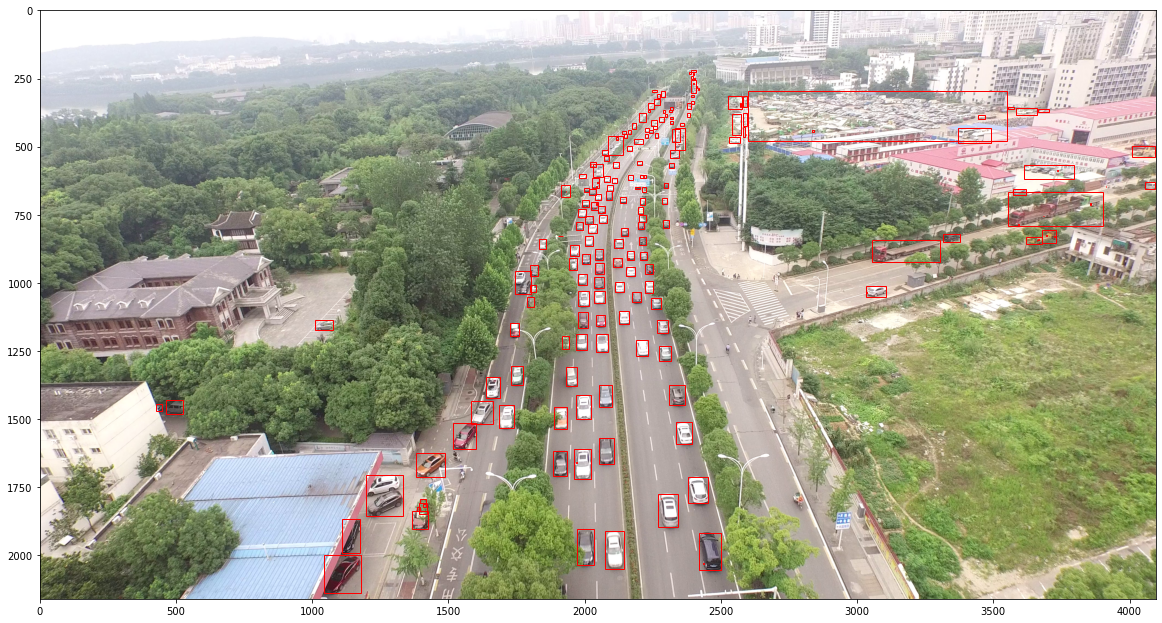

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
import mmcv
from scipy import ndimage

plt.figure(figsize=(20,15))
plt.imshow(Image.open('/content/drive/MyDrive/IRP/mmsegmentation/small_uavid_dataset/images/12000200.png'))

for i in bbox_list:
  plt.gca().add_patch(Rectangle((i[0],i[1]),i[2],i[3],linewidth=1,edgecolor='r',facecolor='none'))


In [ ]:
import numpy as np
from PIL import Image
import cv2  
import os

UAVID_palette = \
  {
    0:(0,0,0),
    1:(0,0,255)
  }

def processImage(input_dir, out_file):
  idx = 0
  annotations = []
  images = []
  obj_count = 0
  for subdir, dirs, files in os.walk(input_dir):
    for file in files:
      currentpath = os.path.join(subdir, file)
      if ".png" in currentpath:
        print(os.path.join(subdir, file))
        print(idx)
        height, width = mmcv.imread(currentpath).shape[:2]
        images.append(dict(
                        id=idx,
                        file_name=str(file),
                        height=height,
                        width=width))
        
        img = Image.open(currentpath)
        img_array = np.asarray(img)
        new_img = img_array.copy()

        #car park, moving car, road, static car 
        #[0,0,0],[64,0,128],[128,64,128],[192,0,192]

        vehicle_filter = np.all(img_array == [64,0,128], axis=2)|np.all(img_array == [192,0,192], axis=2)
        #road_filter = np.all(img_array == [128,64,128], axis=2)

        for i in range(len(vehicle_filter)):
          for j in range(len(vehicle_filter[0])):
            if vehicle_filter[i][j]:
              new_img[i][j] = [0,0,255]
            else:
              new_img[i][j] = [0,0,0]

        palette = {v: k for k, v in UAVID_palette.items()}
        arr_2d = np.zeros((new_img.shape[0], new_img.shape[1]), dtype=np.uint8)
        for c, i in palette.items():
          m = np.all(new_img == np.array(c).reshape(1, 1, 3), axis=2)
          arr_2d[m] = i
        binary = arr_2d
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

        for obj in contours:
          #filter bad segmentation
          if len(obj)>3: 
            px = []
            py = []
            for point in obj:
              px.append(int(point[0][0]))
              py.append(int(point[0][1]))
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (min(px), min(py), max(px), max(py))
            data_anno = dict(
                              image_id=idx,
                              id=obj_count,
                              category_id=0,
                              bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                              area=(x_max - x_min) * (y_max - y_min),
                              segmentation=[poly],
                              iscrowd=0)
            annotations.append(data_anno)   
            obj_count += 1
        idx = idx + 1
  coco_format_json = dict(
      images=images,
      annotations=annotations,
      categories=[{'id':0, 'name': 'vehicle'}])
  mmcv.dump(coco_format_json, out_file)
      

In [ ]:
processImage('/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels','/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/annotation_coco.json')

/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/6000600.png
0
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/6000800.png
1
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/6000700.png
2
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/6000900.png
3
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/5000800.png
4
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/5000700.png
5
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/5000900.png
6
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/5000400.png
7
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/3000200.png
8
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/35000300.png
9
/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/semantic_labels/35000200.png
10
/content/drive/MyDrive/IRP/mmdetection/data/uavid/t

In [ ]:
processImage('/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels','/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/annotation_coco.json')

/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000200.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000900.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000500.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000300.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000700.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000800.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000400.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/4000600.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/12000700.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/12000600.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/12000500.png
/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/semantic_labels/12000400.png
/content/dri

In [36]:
%cd mmdetection/

/content/drive/MyDrive/IRP/mmdetection


In [37]:
from mmcv import Config
cfg = Config.fromfile('./configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_coco.py')

In [40]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'COCODataset'

cfg.data.test.ann_file = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/annotation_coco.json'
cfg.data.test.img_prefix = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/images/'
cfg.data.test.classes = ('vehicle',)

cfg.data.train.ann_file = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/annotation_coco.json'
cfg.data.train.img_prefix = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/train/images/'
cfg.data.train.classes = ('vehicle',)


cfg.data.val.ann_file = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/annotation_coco.json'
cfg.data.val.img_prefix = '/content/drive/MyDrive/IRP/mmdetection/data/uavid/val/images/'
cfg.data.val.classes = ('vehicle',)

# modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/MaskRcnn'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = 'cuda'
# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cross

In [63]:
detection_cfg = cfg

In [39]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=1.86s)
creating index...
index created!


2022-08-22 02:34:20,844 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-08-22 02:34:21,586 - mmdet - INFO - load checkpoint from local path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


Done (t=0.73s)
creating index...
index created!


2022-08-22 02:34:23,518 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.mask_head.conv_logits.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 256, 1, 1]).
size mismatch for roi_head.mask_head.conv_logits.bias

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 0.2 task/s, elapsed: 80s, ETA:     0s

KeyError: ignored

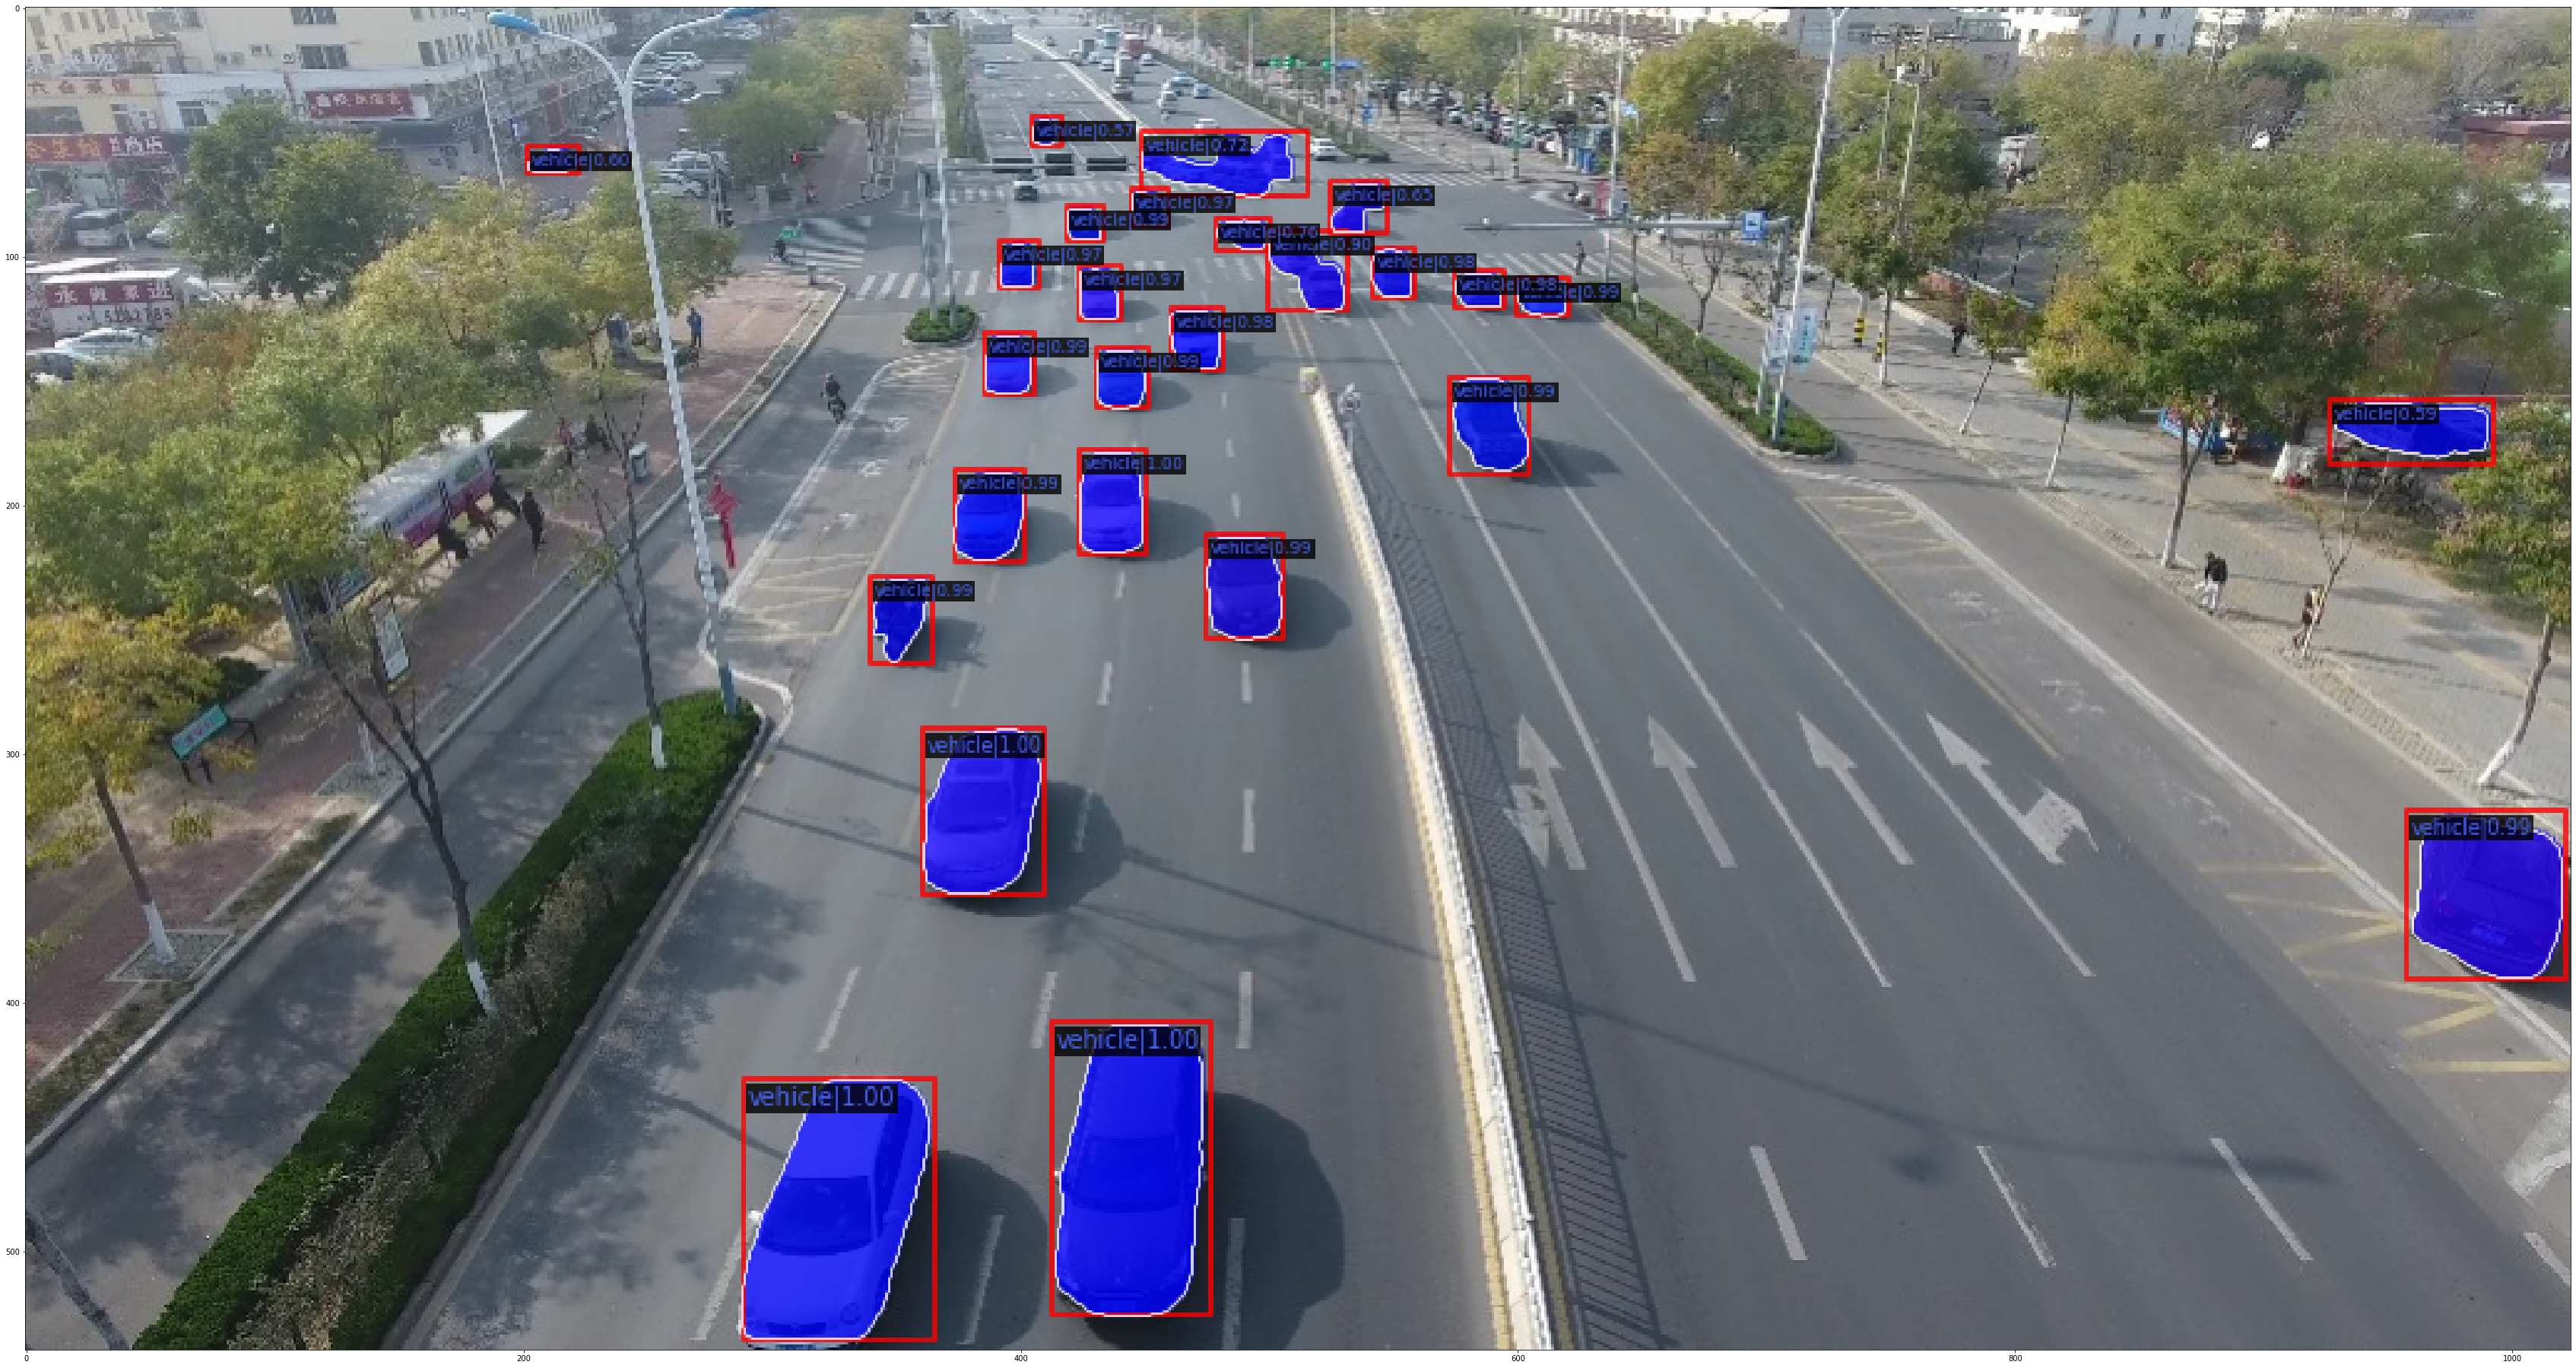

In [62]:
from mmdet.apis import inference_detector, show_result_pyplot
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/MyDrive/IRP/UAVDT/images/M0605_000500.jpg')

model.cfg = cfg
result = inference_detector(model, img)
img = model.show_result(img, result, score_thr=0.5, bbox_color = 'red', mask_color = 'blue')
plt.figure(figsize=(60,40))
plt.imshow(mmcv.bgr2rgb(img))

# **Segmentation**

In [ ]:
%cd mmsegmentation
!python ./tools/train.py ./configs/_base_/models/mysegmentation.py

[Errno 2] No such file or directory: 'mmsegmentation'
/content/drive/MyDrive/IRP/mmsegmentation
2022-08-02 03:03:16,230 - mmseg - INFO - Multi-processing start method is `None`
2022-08-02 03:03:16,230 - mmseg - INFO - OpenCV num_threads is `<built-in function getNumThreads>
2022-08-02 03:03:16,273 - mmseg - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla V100-SXM2-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.1, V11.1.105
GCC: x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.11.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)
  - OpenMP 201511 (a.k.a. OpenMP 

In [ ]:
%cd ..

/content/drive/MyDrive/IRP


# **Tracking Inference**

In [ ]:
%cd mmtracking/

/content/drive/MyDrive/IRP/mmtracking


In [ ]:
# unset the proxy for downloading the pretrained models (optional)
!unset https_proxy
!unset http_proxy

# download checkpoints
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth -P ./checkpoints
!wget -c https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth -P ./checkpoints
!wget -c https://download.openmmlab.com/mmtracking/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth -P ./checkpoints

--2022-08-11 12:31:45--  https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.187.167
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.187.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282801031 (270M) [application/octet-stream]
Saving to: ‘./checkpoints/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth’

selsa_faster_rcnn_r 100%[===================>] 269.70M  9.97MB/s    in 26s     

2022-08-11 12:32:13 (10.3 MB/s) - ‘./checkpoints/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth’ saved [282801031/282801031]

--2022-08-11 12:32:13--  https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
Resolving download.openmmlab.com (download.openmmla

In [ ]:
# run mot demo
import mmcv
import tempfile
from mmtrack.apis import inference_mot, init_model
mot_config = './configs/mot/deepsort/deepsort_faster-rcnn_fpn_4e_mot17-private-half.py'
input_video = './demo/demo.mp4'
imgs = mmcv.VideoReader(input_video)
# build the model from a config file
mot_model = init_model(mot_config, device='cuda:0')
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
# test and show/save the images
for i, img in enumerate(imgs):
    result = inference_mot(mot_model, img, frame_id=i)
    mot_model.show_result(
            img,
            result,
            show=False,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()

output = './demo/mot.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2022-08-12 21:17:33,431 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth'}
2022-08-12 21:17:33,433 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
2022-08-12 21:17:33,435 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
Downloading: "https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth" to /root/.cache/torch/hub/checkpoints/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth


  0%|          | 0.00/158M [00:00<?, ?B/s]

2022-08-12 21:17:50,380 - mmtrack - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth'}
2022-08-12 21:17:50,382 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth
2022-08-12 21:17:50,384 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth
Downloading: "https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_iter25245-a452f51f.pth" to /root/.cache/torch/hub/checkpoints/tracktor_reid_r50_iter25245-a452f51f.pth


  0%|          | 0.00/98.4M [00:00<?, ?B/s]

2022-08-12 21:17:59,567 - mmcv - WARNING - The model and loaded state dict do not match exactly

missing keys in source state_dict: head.bn.weight, head.bn.bias, head.bn.running_mean, head.bn.running_var, head.classifier.weight, head.classifier.bias



[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 4.6 task/s, elapsed: 2s, ETA:     0s
 making the output video at ./demo/mot.mp4 with a FPS of 3.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 21.1 task/s, elapsed: 0s, ETA:     0s


In [ ]:
%cd ..

/content/drive/MyDrive/IRP


8

# **Tracking Tutorial**

In [10]:
%cd mmtracking/

/content/drive/MyDrive/IRP/mmtracking


In [ ]:
!mkdir data
!wget https://download.openmmlab.com/mmtracking/data/MOT17_tiny.zip -P ./data
!unzip -q ./data/MOT17_tiny.zip -d ./data

--2022-08-12 21:22:36--  https://download.openmmlab.com/mmtracking/data/MOT17_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.187.167
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.187.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344566302 (329M) [application/zip]
Saving to: ‘./data/MOT17_tiny.zip’

MOT17_tiny.zip      100%[===================>] 328.60M  11.3MB/s    in 30s     

2022-08-12 21:23:07 (11.1 MB/s) - ‘./data/MOT17_tiny.zip’ saved [344566302/344566302]



In [ ]:
# convert the dataset to coco format
!python ./tools/convert_datasets/mot/mot2coco.py -i ./data/MOT17_tiny/ -o ./data/MOT17_tiny/annotations --split-train --convert-det
# crop pedestrian patches from the original dataset for training reid model. It may take a few minutes.
!rm -rf ./data/MOT17_tiny/reid
!python ./tools/convert_datasets/mot/mot2reid.py -i ./data/MOT17_tiny/ -o ./data/MOT17_tiny/reid --val-split 0.9 --vis-threshold 0.8

Converting train set to COCO format
100% 2/2 [00:00<00:00,  2.40it/s]
train has 145 instances.
Done! Saved as ./data/MOT17_tiny/annotations/train_cocoformat.json and ./data/MOT17_tiny/annotations/train_detections.pkl
Converting test set to COCO format
0it [00:00, ?it/s]
test has 0 instances.
Done! Saved as ./data/MOT17_tiny/annotations/test_cocoformat.json and ./data/MOT17_tiny/annotations/test_detections.pkl
Converting half-train set to COCO format
100% 2/2 [00:01<00:00,  1.07it/s]
half-train has 104 instances.
Done! Saved as ./data/MOT17_tiny/annotations/half-train_cocoformat.json and ./data/MOT17_tiny/annotations/half-train_detections.pkl
Converting half-val set to COCO format
100% 2/2 [00:01<00:00,  1.08it/s]
half-val has 122 instances.
Done! Saved as ./data/MOT17_tiny/annotations/half-val_cocoformat.json and ./data/MOT17_tiny/annotations/half-val_detections.pkl
100% 2/2 [14:23<00:00, 431.65s/it]


/content/drive/MyDrive/IRP/mmtracking


In [32]:
#Train a detector for MOT
import mmcv
from mmdet.apis import set_random_seed
#cfg = mmcv.Config.fromfile('/content/drive/MyDrive/IRP/mmdetection/configs/_base_/models/mmydetection.py')
#'''
cfg = mmcv.Config.fromfile('./configs/det/faster-rcnn_r50_fpn_4e_mot17-half.py')
cfg.data_root = 'data/UAVDT_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.ann_file = cfg.data.train.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.classes = ('vehicle',)
cfg.data.test.classes = ('vehicle',)
cfg.data.val.classes = ('vehicle',)

cfg.data.test.img_prefix = cfg.data.test.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.img_prefix = cfg.data.train.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.val.img_prefix = cfg.data.val.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')

cfg.work_dir = './mytracker/detector'
cfg.seed = 0
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

cfg.log_config.interval=100
cfg.evaluation.metric = 'mAP'
cfg.evaluation.interval=1
#'''
#cfg.USE_MMDET = False
#cfg.load_from = '/content/drive/MyDrive/IRP/mmtracking/mytracker/detector/mydetector.pth'
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    detector=dict(
        type='FasterRCNN',
        backbone=dict(
            type='ResNet',
            depth=50,
            num_stages=4,
            out_indices=(0, 1, 2, 3),
            frozen_stages=1,
            norm_cfg=dict(type='BN', requires_grad=True),
            norm_eval=True,
            style='pytorch',
            init_cfg=dict(
                type='Pretrained', checkpoint='torchvision://resnet50')),
        neck=dict(
            type='FPN',
            in_channels=[256, 512, 1024, 2048],
            out_channels=256,
            num_outs=5),
        rpn_head=dict(
            type='RPNHead',
            in_channels=256,
            feat_channels=256,
            anchor_generator=dict(
                type='AnchorGenerator',
                scales=[8],
                ratios=[0.5, 1.0, 2.0],
                strides=[4, 8, 16, 32, 64]),
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0.0,

In [33]:
import os.path as osp

from mmtrack.datasets import build_dataset
from mmdet.apis import train_detector as train_model
from mmdet.models import build_detector as build_model

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
model = build_model(cfg.model.detector)
model.init_weights()
cfg.device = 'cuda'
datasets = [build_dataset(cfg.data.train)]
model.CLASSES = datasets[0].CLASSES
train_model(model, datasets, cfg)

2022-08-22 02:01:00,487 - mmcv - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': 'http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth'}
2022-08-22 02:01:00,489 - mmcv - INFO - load model from: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth
2022-08-22 02:01:00,491 - mmcv - INFO - load checkpoint from http path: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth
2022-08-22 02:01:00,674 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mism

loading annotations into memory...


2022-08-22 02:01:01,365 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-08-22 02:01:01,371 - mmdet - INFO - Start running, host: root@46533dbd1637, work_dir: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector
2022-08-22 02:01:01,372 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) O

Done (t=0.50s)
creating index...
index created!


2022-08-22 02:01:49,068 - mmdet - INFO - Epoch [1][100/1500]	lr: 1.980e-02, eta: 0:46:49, time: 0.476, data_time: 0.238, memory: 3317, loss_rpn_cls: 0.0724, loss_rpn_bbox: 0.0667, loss_cls: 0.3111, acc: 86.0547, loss_bbox: 0.2146, loss: 0.6647
2022-08-22 02:02:45,056 - mmdet - INFO - Epoch [1][200/1500]	lr: 2.000e-02, eta: 0:50:04, time: 0.560, data_time: 0.336, memory: 3317, loss_rpn_cls: 0.0736, loss_rpn_bbox: 0.0745, loss_cls: 0.2437, acc: 89.9873, loss_bbox: 0.1502, loss: 0.5420
2022-08-22 02:03:41,428 - mmdet - INFO - Epoch [1][300/1500]	lr: 2.000e-02, eta: 0:50:39, time: 0.564, data_time: 0.330, memory: 3317, loss_rpn_cls: 0.0405, loss_rpn_bbox: 0.0569, loss_cls: 0.1976, acc: 91.8359, loss_bbox: 0.1242, loss: 0.4192
2022-08-22 02:04:36,329 - mmdet - INFO - Epoch [1][400/1500]	lr: 2.000e-02, eta: 0:50:08, time: 0.549, data_time: 0.314, memory: 3317, loss_rpn_cls: 0.0330, loss_rpn_bbox: 0.0502, loss_cls: 0.2117, acc: 91.0273, loss_bbox: 0.1204, loss: 0.4154
2022-08-22 02:05:30,840 

KeyboardInterrupt: ignored

In [40]:
#Train a ReID model for MOT
import mmcv
from mmdet.apis import set_random_seed
#cfg = mmcv.Config.fromfile('./configs/reid/myreid.py')
#'''
cfg = mmcv.Config.fromfile('./configs/reid/resnet50_b32x8_MOT17.py')
cfg.data_root = 'data/UAVDT_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.ann_file = 'data/UAVDT_tiny/reid/meta/train_9.txt'
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')

cfg.data.test.data_prefix = cfg.data.test.data_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.data_prefix = cfg.data.train.data_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.val.data_prefix = cfg.data.val.data_prefix.replace('data/MOT17/','data/UAVDT_tiny/')

# learning policy
cfg.lr_config = dict(
    policy='step',
    warmup='linear',
    warmup_iters=200,
    warmup_ratio=1.0 / 200,
    step=[1])
cfg.total_epochs = 10

cfg.data.train.triplet_sampler = dict(num_ids=4, ins_per_id=4)

cfg.work_dir = './mytracker/reid'
cfg.seed = 0
cfg.gpu_ids = range(1)
#'''
set_random_seed(0, deterministic=False)

print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'ReIDDataset'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadMultiImagesFromFile', to_float32=True),
    dict(
        type='SeqResize',
        img_scale=(128, 256),
        share_params=False,
        keep_ratio=False,
        bbox_clip_border=False,
        override=False),
    dict(
        type='SeqRandomFlip',
        share_params=False,
        flip_ratio=0.5,
        direction='horizontal'),
    dict(
        type='SeqNormalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='VideoCollect', keys=['img', 'gt_label']),
    dict(type='ReIDFormatBundle')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', img_scale=(128, 256), keep_ratio=False),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),

In [41]:
from mmtrack.datasets import build_dataset
from mmdet.apis import train_detector as train_model
from mmtrack.models import build_reid as build_model


model = build_model(cfg.model.reid)
model.init_weights()
cfg.device = 'cuda'
datasets = [build_dataset(cfg.data.train)]
model.CLASSES = datasets[0].CLASSES

train_model(model, datasets, cfg)

2022-08-21 04:28:04,258 - mmdet - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_batch256_imagenet_20200708-cfb998bf.pth'}
2022-08-21 04:28:04,260 - mmcv - INFO - load model from: https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_batch256_imagenet_20200708-cfb998bf.pth
2022-08-21 04:28:04,261 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_batch256_imagenet_20200708-cfb998bf.pth
Downloading: "https://download.openmmlab.com/mmclassification/v0/resnet/resnet50_batch256_imagenet_20200708-cfb998bf.pth" to /root/.cache/torch/hub/checkpoints/resnet50_batch256_imagenet_20200708-cfb998bf.pth


  0%|          | 0.00/97.7M [00:00<?, ?B/s]

2022-08-21 04:28:12,985 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: head.fc.weight, head.fc.bias

missing keys in source state_dict: head.fcs.0.fc.weight, head.fcs.0.fc.bias, head.fcs.0.bn.weight, head.fcs.0.bn.bias, head.fcs.0.bn.running_mean, head.fcs.0.bn.running_var, head.fc_out.weight, head.fc_out.bias, head.bn.weight, head.bn.bias, head.bn.running_mean, head.bn.running_var, head.classifier.weight, head.classifier.bias

2022-08-21 04:28:13,071 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-08-21 04:28:13,075 - mmdet - INFO - Start running, host: root@f1ab6672ac9d, work_dir: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid
2022-08-21 04:28:13,077 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(VERY_LOW    ) TextLoggerHook                     
 -------

In [10]:
import mmcv
cfg = mmcv.Config.fromfile('/content/drive/MyDrive/IRP/mmtracking/configs/mot/tracktor/tracktor_faster-rcnn_r50_fpn_4e_mot16-public-half.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    detector=dict(
        type='FasterRCNN',
        backbone=dict(
            type='ResNet',
            depth=50,
            num_stages=4,
            out_indices=(0, 1, 2, 3),
            frozen_stages=1,
            norm_cfg=dict(type='BN', requires_grad=True),
            norm_eval=True,
            style='pytorch',
            init_cfg=dict(
                type='Pretrained', checkpoint='torchvision://resnet50')),
        neck=dict(
            type='FPN',
            in_channels=[256, 512, 1024, 2048],
            out_channels=256,
            num_outs=5),
        rpn_head=dict(
            type='RPNHead',
            in_channels=256,
            feat_channels=256,
            anchor_generator=dict(
                type='AnchorGenerator',
                scales=[8],
                ratios=[0.5, 1.0, 2.0],
                strides=[4, 8, 16, 32, 64]),
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0.0,

/content/drive/MyDrive/IRP/mmtracking


In [10]:
#Test the DeepSORT model
import mmcv
from mmdet.apis import set_random_seed

#cfg = mmcv.Config.fromfile('./configs/mot/deepsort/deepsort_faster-rcnn_fpn_4e_mot17-private-half.py')
cfg = mmcv.Config.fromfile('/content/drive/MyDrive/IRP/mmtracking/configs/mot/tracktor/tracktor_faster-rcnn_r50_fpn_4e_mot17-private-half.py')
#cfg = mmcv.Config.fromfile('/content/drive/MyDrive/IRP/mmtracking/configs/mot/myTrack.py')
#'''
cfg.data_root = 'data/UAVDT_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/UAVDT_tiny/')

cfg.data.test.img_prefix = cfg.data.test.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.train.img_prefix = cfg.data.train.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')
cfg.data.val.img_prefix = cfg.data.val.img_prefix.replace('data/MOT17/','data/UAVDT_tiny/')

cfg.model.detector.init_cfg.checkpoint = '/content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth'
cfg.model.reid.init_cfg.checkpoint = '/content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth'

cfg.work_dir = './mytracker'
cfg.seed = 0
cfg.gpu_ids = range(1)
cfg.data.test.test_mode = True
#'''
#set_random_seed(0, deterministic=False)
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    detector=dict(
        type='FasterRCNN',
        backbone=dict(
            type='ResNet',
            depth=50,
            num_stages=4,
            out_indices=(0, 1, 2, 3),
            frozen_stages=1,
            norm_cfg=dict(type='BN', requires_grad=True),
            norm_eval=True,
            style='pytorch',
            init_cfg=dict(
                type='Pretrained', checkpoint='torchvision://resnet50')),
        neck=dict(
            type='FPN',
            in_channels=[256, 512, 1024, 2048],
            out_channels=256,
            num_outs=5),
        rpn_head=dict(
            type='RPNHead',
            in_channels=256,
            feat_channels=256,
            anchor_generator=dict(
                type='AnchorGenerator',
                scales=[8],
                ratios=[0.5, 1.0, 2.0],
                strides=[4, 8, 16, 32, 64]),
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0.0,

In [ ]:
from mmtrack.datasets import build_dataloader
from mmtrack.apis import init_model
from mmcv.parallel import MMDataParallel
from mmtrack.apis import single_gpu_test
from mmtrack.datasets import build_dataset

dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
    dataset,
    samples_per_gpu=1,
    workers_per_gpu=cfg.data.workers_per_gpu,
    dist=False,
    shuffle=False)

# build the model and load checkpoint
model = init_model(cfg)

model = MMDataParallel(model, device_ids=cfg.gpu_ids)
outputs = single_gpu_test(model, data_loader)

eval_kwargs = cfg.get('evaluation', {}).copy()
# hard-code way to remove EvalHook args
eval_hook_args = [
    'interval', 'tmpdir', 'start', 'gpu_collect', 'save_best',
    'rule', 'by_epoch'
]
for key in eval_hook_args:
    eval_kwargs.pop(key, None)
eval_kwargs.update(dict(metric=['track']))
metric = dataset.evaluate(outputs, **eval_kwargs)
print(metric)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


2022-08-21 04:43:46,617 - mmdet - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth'}
2022-08-21 04:43:46,619 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-21 04:43:46,620 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-21 04:43:47,232 - mmdet - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth'}
2022-08-21 04:43:47,234 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth
2022-08-21 04:43:47,237 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth
2022-08-21 04:43:47,580 - mmdet - INFO - 
detector.backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
Pre

[>>>>>>>>>>>>>              ] 1472/2986, 3.1 task/s, elapsed: 468s, ETA:   481s

In [ ]:
import mmcv
import tempfile
from mmtrack.apis import inference_mot, init_model
input_video = '/content/drive/MyDrive/IRP/uavid_v1.5_official_release/uavid_train/seq1/images.mp4'
imgs = mmcv.VideoReader(input_video)
# build the model from a config file
mot_model = init_model(cfg, device='cuda:0')
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
for i, img in enumerate(imgs):
    result = inference_mot(mot_model, img, frame_id=i)
    mot_model.show_result(
            img,
            result,
            show=False,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()
output = './demo/test.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

In [11]:
from mmtrack.apis import inference_mot, init_model
import mmcv
mot_model = init_model(cfg, device='cuda:0')


2022-08-22 07:19:33,086 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth'}
2022-08-22 07:19:33,088 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-22 07:19:33,090 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-22 07:19:57,680 - mmtrack - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth'}
2022-08-22 07:19:57,682 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth
2022-08-22 07:19:57,684 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth


In [12]:
import os
rootdir = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0101/img1'
imgs = {}
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    currentpath = os.path.join(subdir, file)
    if ".jpg" in currentpath:
      img = mmcv.imread(currentpath)
      imgs[str(int(file[:6]))] = img

In [13]:
from mmtrack.core import imshow_tracks, results2outs
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

outs_track_list = []
result_list = []
for i in range(30):
  result = inference_mot(mot_model, imgs[str(i+1)], frame_id=i)
  assert isinstance(result, dict)
  track_bboxes = result.get('track_bboxes', None)
  track_masks = result.get('track_masks', None)
  result_list.append(result)
  outs_track = results2outs(
    bbox_results=track_bboxes,
    mask_results=track_masks,
    mask_shape=img.shape[:2]) 
  outs_track_list.append(outs_track)

# **predict motion**

In [20]:
from mmtrack.apis import inference_mot, init_model
import mmcv
mot_model = init_model(cfg, device='cuda:0')


2022-08-22 08:31:13,105 - mmtrack - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth'}
2022-08-22 08:31:13,107 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-22 08:31:13,108 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/detector/epoch_4.pth
2022-08-22 08:31:13,579 - mmtrack - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': '/content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth'}
2022-08-22 08:31:13,581 - mmcv - INFO - load model from: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth
2022-08-22 08:31:13,583 - mmcv - INFO - load checkpoint from local path: /content/drive/MyDrive/IRP/mmtracking/mytracker/reid/epoch_2.pth


In [21]:
import os
rootdir = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0101/img1'
imgs = {}
for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    currentpath = os.path.join(subdir, file)
    if ".jpg" in currentpath:
      img = mmcv.imread(currentpath)
      imgs[str(int(file[:6]))] = img



In [22]:
from mmtrack.core import imshow_tracks, results2outs
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

outs_track_list = []
for i in range(40):
  result = inference_mot(mot_model, imgs[str(i+1)], frame_id=i)
  assert isinstance(result, dict)
  track_bboxes = result.get('track_bboxes', None)
  track_masks = result.get('track_masks', None)
  outs_track = results2outs(
    bbox_results=track_bboxes,
    mask_results=track_masks,
    mask_shape=img.shape[:2]) 
  outs_track_list.append(outs_track)


In [25]:
outs_track_list[30]

{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'bboxes': array([[ 5.2854401e+02,  3.1886301e+02,  5.6417432e+02,  3.5677570e+02,
          9.9997807e-01],
        [ 5.9277997e+02,  4.0803186e+02,  6.3438037e+02,  4.5182626e+02,
          9.9997556e-01],
        [ 5.4634259e+02,  3.0247366e+02,  5.8271497e+02,  3.4009692e+02,
          9.9995804e-01],
        [ 5.5268176e+02,  3.5989410e+02,  5.8959833e+02,  3.9735742e+02,
          9.9994814e-01],
        [ 6.4265686e+01,  1.7488794e+02,  1.7339418e+02,  2.2074954e+02,
          9.9986482e-01],
        [ 4.6776440e+02,  3.3042896e+02,  5.0670145e+02,  3.7134921e+02,
          9.9985909e-01],
        [ 1.3982285e+02,  2.7018228e+02,  1.9028889e+02,  2.9224213e+02,
          9.9985683e-01],
        [ 4.0779208e+02,  2.7819559e+02,  4.4683081e+02,  3.1386841e+02,
          9.9981600e-01],
        [ 2.8962091e+02,  2.5726672e+02,  3.3469962e+02,  2.7965921e+02,
          9.9972636e-01],
        [ 1.4551183e+02,  2.461131

532 188 564 212
530 190 563 213
529 191 562 215
528 194 561 217
528 196 560 219
527 197 559 220
526 199 558 222
525 201 558 224
524 203 556 226
523 204 555 228


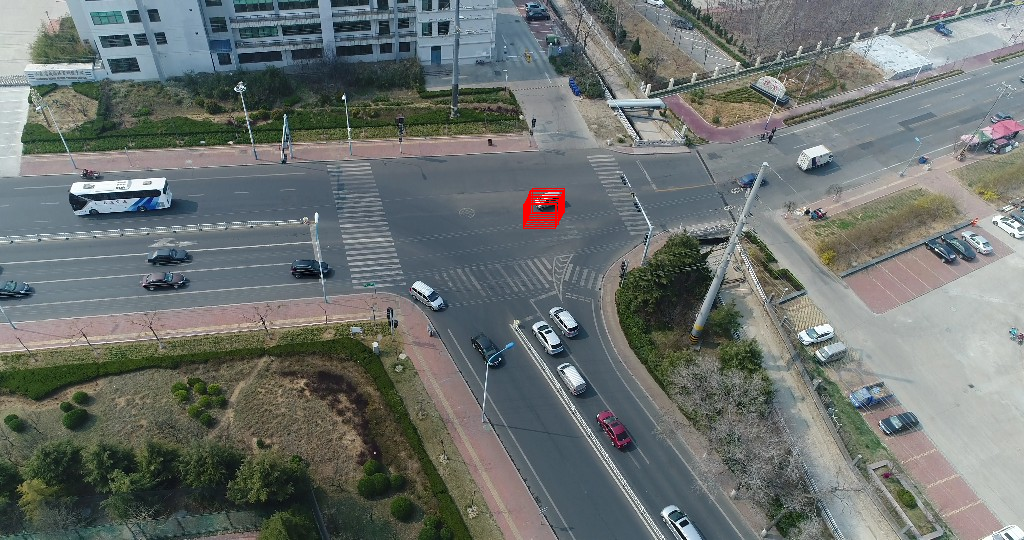

In [33]:
img = imgs['30']
i = 0
for output in outs_track_list:
  if i > 29:
    bboxes = output.get('bboxes', None)
    img_shape = img.shape
    bboxes[:, 0::2] = np.clip(bboxes[:, 0::2], 0, img_shape[1])
    bboxes[:, 1::2] = np.clip(bboxes[:, 1::2], 0, img_shape[0])
    index = np.where(output.get('ids') == 13)[0][0]
    x1, y1, x2, y2 = bboxes[index][:4].astype(np.int32)
    print(x1, y1, x2, y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), thickness=1)
  i = i+1
cv2_imshow(img)

In [35]:
import numpy as np
import torch

bboxes_list = []
vehicle_id = 0

for output in outs_track_list:
  index = np.where(output.get('ids') == vehicle_id)[0][0]
  bboxes = output.get('bboxes')[index][0:4]
  bboxes_list.append(bboxes)
  

#bboxes = torch.FloatTensor(bboxes_list)

In [37]:
def create_inout_sequences(input_data, tw):
    trainX = []
    trainY = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        trainX.append(train_seq)
        trainY.append(train_label)  

    return torch.FloatTensor(trainX), torch.FloatTensor(trainY)

In [40]:
np.shape(trainY)

torch.Size([30, 1, 4])

In [38]:
trainX, trainY = create_inout_sequences(bboxes_list,10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  # This is added back by InteractiveShellApp.init_path()


In [220]:
trainX

tensor([[[565.2565, 154.4128, 596.4009, 176.8907],
         [564.9694, 155.3280, 596.6083, 177.5813],
         [564.0939, 155.6595, 595.3995, 177.7093],
         [561.9935, 156.2950, 593.5879, 178.4908],
         [561.6057, 156.7576, 593.0389, 179.0022]],

        [[564.9694, 155.3280, 596.6083, 177.5813],
         [564.0939, 155.6595, 595.3995, 177.7093],
         [561.9935, 156.2950, 593.5879, 178.4908],
         [561.6057, 156.7576, 593.0389, 179.0022],
         [560.5007, 157.1158, 591.9397, 179.2853]],

        [[564.0939, 155.6595, 595.3995, 177.7093],
         [561.9935, 156.2950, 593.5879, 178.4908],
         [561.6057, 156.7576, 593.0389, 179.0022],
         [560.5007, 157.1158, 591.9397, 179.2853],
         [559.6002, 157.7608, 590.5439, 180.0382]],

        [[561.9935, 156.2950, 593.5879, 178.4908],
         [561.6057, 156.7576, 593.0389, 179.0022],
         [560.5007, 157.1158, 591.9397, 179.2853],
         [559.6002, 157.7608, 590.5439, 180.0382],
         [558.1280, 158.2

tensor([[536.8560, 179.5632, 568.8517, 203.1002],
        [535.5900, 181.3536, 567.4316, 205.1230],
        [534.4915, 182.8426, 566.7485, 206.9807],
        [533.4078, 184.7484, 565.1255, 208.4178],
        [532.2508, 186.4579, 564.1914, 210.1073]])

In [199]:
#https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=vIWvJCpOVmwU
import torch.nn as nn
from torch.autograd import Variable
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size=2, num_layers=1):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = 5
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [227]:
num_epochs = 200000
learning_rate = 0.01
lstm = LSTM(input_size = 4, num_classes=4)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(Variable(trainX))
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, Variable(trainY))
    
    loss.backward()
    
    optimizer.step()
    if epoch % 10000 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 174294.92188
Epoch: 10000, loss: 111336.51562
Epoch: 20000, loss: 67111.13281
Epoch: 30000, loss: 36296.17578
Epoch: 40000, loss: 15157.86914
Epoch: 50000, loss: 3417.74243
Epoch: 60000, loss: 121.16091
Epoch: 70000, loss: 79.96993
Epoch: 80000, loss: 79.96993
Epoch: 90000, loss: 79.96993


KeyboardInterrupt: ignored

In [228]:
lstm.eval()
train_predict = lstm(Variable(torch.FloatTensor([bboxes_list[-5:]])))

In [219]:
dataX = Variable(torch.FloatTensor([bboxes_list[-5:]]))
lstm.eval()
train_predict = lstm(dataX)
dataX

tensor([[536.8560, 179.5632, 568.8517, 203.1002],
        [535.5900, 181.3536, 567.4316, 205.1230],
        [534.4915, 182.8426, 566.7485, 206.9807],
        [533.4078, 184.7484, 565.1255, 208.4178],
        [532.2508, 186.4579, 564.1914, 210.1073]])

In [229]:
train_predict

tensor([[545.9293, 168.7051, 577.5557, 191.6503]], grad_fn=<AddmmBackward0>)

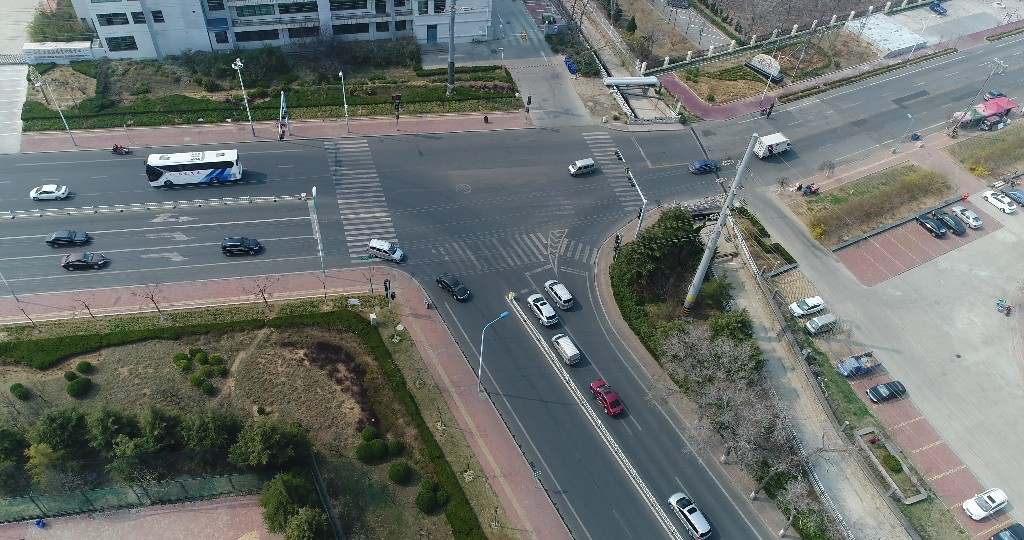

In [16]:
import os.path as osp
import random

import cv2
import matplotlib
import matplotlib.pyplot as plt
import mmcv
import numpy as np
import seaborn as sns

def random_color(seed):
    """Random a color according to the input seed."""
    random.seed(seed)
    colors = sns.color_palette()
    color = random.choice(colors)
    return color

outs_track = outs_track_list[19]
img = imgs['20']
bboxes = outs_track.get('bboxes', None)
labels = outs_track.get('labels', None)
ids = outs_track.get('ids', None)
masks = outs_track.get('masks', None)
score_thr = 0
thickness = 1
font_scale = 0.5
show = True
out_file = None
wait_time = 0
classes=None

img_shape = img.shape
bboxes[:, 0::2] = np.clip(bboxes[:, 0::2], 0, img_shape[1])
bboxes[:, 1::2] = np.clip(bboxes[:, 1::2], 0, img_shape[0])

inds = np.where(bboxes[:, -1] > score_thr)[0]
bboxes = bboxes[inds]
labels = labels[inds]
ids = ids[inds]
if masks is not None:
    assert masks.ndim == 3
    masks = masks[inds]
    assert masks.shape[0] == bboxes.shape[0]

text_width, text_height = 9, 13
for i, (bbox, label, id) in enumerate(zip(bboxes, labels, ids)):
  x1, y1, x2, y2 = bbox[:4].astype(np.int32)
  #print(x1, y1, x2, y2)
  score = float(bbox[-1])

  # bbox
  bbox_color = random_color(id)
  bbox_color = [int(255 * _c) for _c in bbox_color][::-1]
  cv2.rectangle(img, (x1, y1), (x2, y2), bbox_color, thickness=thickness)

  # score
  text = '{:.02f}'.format(score)
  if classes is not None:
      text += f'|{classes[label]}'
  width = len(text) * text_width
  img[y1:y1 + text_height, x1:x1 + width, :] = bbox_color
  cv2.putText(
      img,
      text, (x1, y1 + text_height - 2),
      cv2.FONT_HERSHEY_COMPLEX,
      font_scale,
      color=(0, 0, 0))

  # id
  text = str(id)
  width = len(text) * text_width
  img[y1 + text_height:y1 + 2 * text_height,
      x1:x1 + width, :] = bbox_color
  cv2.putText(
      img,
      str(id), (x1, y1 + 2 * text_height - 2),
      cv2.FONT_HERSHEY_COMPLEX,
      font_scale,
      color=(0, 0, 0))

  # mask
  if masks is not None:
      mask = masks[i].astype(bool)
      mask_color = np.array(bbox_color, dtype=np.uint8).reshape(1, -1)
      img[mask] = img[mask] * 0.5 + mask_color * 0.5
  
cv2_imshow(imgs['1'])


#[(x,y,t)]
#lstm


# **Tracking**

In [ ]:
!unzip UAVDT-M0207.zip

In [12]:
!pwd

/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train


In [20]:
%cd ..

/


#transform uavdt data to coco type

In [24]:
%cd /content/drive/MyDrive/IRP/mmtracking

/content/drive/MyDrive/IRP/mmtracking


/content/drive/MyDrive/IRP/mmtracking


In [21]:

import mmcv
gt_M0101_path = '/content/drive/MyDrive/IRP/UAVDT/GT/M0207_gt_whole.txt'
gt_M0101 = mmcv.list_from_file(gt_M0101_path)
newx = []
for line in gt_M0101:
  xs = line.strip().split(',')
  #xs[1] = '-1'
  xs[6] = '1'
  xs[7] = '1'
  xs[8] = '1'
  #xs.pop(8)
  #xs.pop(7)
  s = ','.join(str(x) for x in xs)
  newx.append(s)
outfile = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0207/gt/gt.txt'
#outfile = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0704/det/det.txt'
      

with open(outfile, "w") as text_file:
    for i in newx:
      text_file.write(i+'\n')

In [22]:
split_frame = len(newx) // 2 + 1 
half_train = newx[:split_frame]
half_val = newx[split_frame:]

outfile_train = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0207/gt/gt_half-train.txt'
outfile_val = '/content/drive/MyDrive/IRP/mmtracking/data/UAVDT_tiny/train/UAVDT-M0207/gt/gt_half-val.txt'

with open(outfile_train, "w") as text_file:
    for i in half_train:
      text_file.write(i+'\n')

with open(outfile_val, "w") as text_file:
    for i in half_val:
      text_file.write(i+'\n')

In [25]:
!python ./tools/convert_datasets/mot/myMot2coco.py -i ./data/UAVDT_tiny/ -o ./data/UAVDT_tiny/annotations --split-train --convert-det

Converting train set to COCO format
100% 9/9 [00:16<00:00,  1.84s/it]
train has 386 instances.
Done! Saved as ./data/UAVDT_tiny/annotations/train_cocoformat.json and ./data/UAVDT_tiny/annotations/train_detections.pkl
Converting test set to COCO format
0it [00:00, ?it/s]
test has 0 instances.
Done! Saved as ./data/UAVDT_tiny/annotations/test_cocoformat.json and ./data/UAVDT_tiny/annotations/test_detections.pkl
Converting half-train set to COCO format
100% 9/9 [00:02<00:00,  3.08it/s]
half-train has 267 instances.
Done! Saved as ./data/UAVDT_tiny/annotations/half-train_cocoformat.json and ./data/UAVDT_tiny/annotations/half-train_detections.pkl
Converting half-val set to COCO format
100% 9/9 [00:02<00:00,  3.02it/s]
half-val has 272 instances.
Done! Saved as ./data/UAVDT_tiny/annotations/half-val_cocoformat.json and ./data/UAVDT_tiny/annotations/half-val_detections.pkl


In [26]:
!python ./tools/convert_datasets/mot/mot2reid.py -i ./data/UAVDT_tiny/ -o ./data/UAVDT_tiny/reid --val-split 0.9 --vis-threshold 0.8

100% 9/9 [33:14<00:00, 221.57s/it]
